<a href="https://colab.research.google.com/github/ratansen/Numerical-Methods-using-Python/blob/main/ode/Runge_Kutta_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Runge - Kutta Methods

Runge – Kutta method is an effective and widely used method for solving the initial-value problems of differential equations. Runge-Kutta (RK) methods achieve the accuracy of a Taylor series approach without requiring the calculation of higher order derivatives. Many variations exist but all can be cast in the generalized form of

$y_{i+1}$ = $y_{i}$ + $\phi(x_{i}, y_{i}, h)h$

where, $\phi(x_{i}, y_{i}, h)$ is called an increment function, which can be interpreted as a representative slope over the interval.

The increment function can be written in general form as

$\phi = a_{1}k_{1} + a_{2}k_{2} +···+ a_{n}k_{n}$

where the a’s are constants and the k’s are

$k_{1} = f(x_{i}, y_{i})$

$k_{2} = f(x_{i} + p_{1}h, y_{i} + q_{11}k_{1}h)$

$k_{3} = f(x_{i} + p_{2}h, y_{i} + q_{21}k_{1}h + q_{22}k_{2}h)$

.

.

.

$k_{n} = f(x_{i} + p_{n−1}h, y_{i} + q_{n−1,1}k_{1}h + q_{n−1,2}k_{2}h +···+ q_{n−1,n−1}k_{n−1}h)$


Various types of Runge-Kutta methods can be devised by employing different numbers of terms in the increment function as specified by n.

### Problem 1
Use the Euler’s method and RK-4 method to solve the problem for a spring-mass system along the X-axis to obtain the position of the mass as a function of time and plot the x-position in Y-axis and time in the X-axis for different methods and compare them with the exact result.

The equation for the spring-mass system is given by

$m\frac{d^{2}x}{dt^{2}} = −kx$     ...(1)

where symbols have their usual meaning.

The initial conditions are $x(t = 0) = x_{0}$ and $v(t = 0) = 0$.

To simplify the calculation let’s assume that $\frac{k}{m} = 1$ and $x_{0} = 1$.


Exact result for this problem is $x = x_{0}cos(t\frac{k}{m})$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

$\frac{dx}{dt} = v$

$\frac{dv}{dt} = -x$

In [ ]:
def f_sd(x):
    return -x

In [ ]:
# Euler's Method is the first order Runge Kutta Method i.e n = 1

def euler(x_0, v_0, t_0, h, n):
    t_n = t_0 + n*h
    t = np.arange(t_0, t_n, step = h)
    x = np.zeros(n)
    v = np.zeros(n)

    x[0] = x_0
    v[0] = v_0

    for i in range(0, n-1):
        x[i + 1] = x[i] + v[i] * h
        v[i + 1] = v[i] + f_sd(x[i]) * h

    return x, v, t

## Second-Order Runge-Kutta Methods
The second-order version of Runge Kutta Method is

$y_{i+1} = y_{i} + (a_{1}k_{1} + a_{2}k_{2})h$

where,

$k_{1} = f(x_{i}, y_{i})$

$k_{2} = f(x_{i} + p_{1}h, y_{i} + q_{11}k_{1}h)$

Values for $a_{l}$, $a_{2}$, $p_{1}$, and $q_{11}$ are evaluated by setting the equation equal to a Taylor series expansion to the second-order term. By doing this, we derive three equations to evaluate the four unknown constants. The three equations are

$a_{1} + a_{2} = 1$

$a_{2}p_{1} = \frac{1}{2}$

$a_{2}q_{11} = \frac{1}{2}$

Heun's method is the second order Runge Kutta Method with $a_{2} = \frac{1}{2}$

Midpoint method is second order Runge Kutta Method with $a_{2} = 1$

In [ ]:
def heuns(x_0, v_0, t_0, h, n):
    t_n = t_0 + n*h
    t = np.arange(t_0, t_n, step = h)
    x = np.zeros(n)
    v = np.zeros(n)

    x[0] = x_0
    v[0] = v_0

    for i in range(0, n-1):
        m_v_left = f_sd(x[i])
        v_old = v[i] + h * m_v_left
        x_old = x[i] + h * v[i]
        m_v_right = f_sd(x_old)
        m_v = (m_v_left + m_v_right)/2.0
        v[i + 1] = v[i] + m_v * h
        m_x = (v[i] + v[i + 1])/2.0
        x[i + 1] = x[i] + h * m_x

    return x, v, t

In [ ]:
def midpoint(x_0, v_0, t_0, h, n):
    t_n = t_0 + n*h
    t = np.arange(t_0, t_n, step = h)
    x = np.zeros(n)
    v = np.zeros(n)

    x[0] = x_0
    v[0] = v_0

    for i in range(0, n-1):
        m_x_0 = v[i]
        xmp = x[i] + m_x_0 * (h/2)
        tmp = t[i] + (h/2)
        m_v_0 = f_sd(x[i])
        vmp = v[i] + m_v_0 * (h/2)
        m_v = f_sd(xmp)
        m_x = vmp
        x[i + 1] = x[i] + m_x * h
        v[i + 1] = v[i] + m_v * h
    return x, v, t

## Fourth order Runge - Kutta Method (RK4 Method)


The most commonly used form, called $Classical$ $Fourth$ $Order$ $Runge - Kutta$ $Method$ is  

$y_{i+1} = y_{i} + \frac{1}{6}(k_{1} + 2k_{2} + 2k_{3}+ k_{4}) h$

where,

$k_{1} = f(x_{i} ,y_{i})$

$k_{2} = f(x_{i} + \frac{h}{2} ,y_{i} + k_{1}\frac{h}{2})$

$k_{3} = f(x_{i} + \frac{h}{2} ,y_{i} + k_{2}\frac{h}{2})$

$k_{4} = f(x_{i} + h ,y_{i} + k_{3}h)$

$h = step   size$


Each of the k’s represents a slope.

The equation then represents a weighted average of these to arrive at the improved slope.

In [ ]:
def rk_4(x_0, v_0, t_0, h, n):
    # v = y'
    # we know x'' = v'
    # using x'', find v
    # using v = x', find x
    t_n = t_0 + n*h
    t = np.arange(t_0, t_n, step = h)
    x = np.zeros(n)
    v = np.zeros(n)

    x[0] = x_0
    v[0] = v_0

    for i in range(0, n-1):
        kx1 = v[i]
        kv1 = f_sd(x[i])
        kx2 = v[i] + (h/2.0) * kv1
        kv2 = f_sd(x[i] + kx1 * h/2.0)
        kx3 = v[i] + (h/2.0) * kv2
        kv3 = f_sd(x[i] + kx2 * h/2.0)
        kx4 = v[i] + (h) * kv3
        kv4 = f_sd(x[i] + h * kx3)
        x[i + 1] = x[i] + (kx1 + 2*kx2 + 2*kx3 + kx4) * (h/6.0)
        v[i + 1] = v[i] + (kv1 + 2*kv2 + 2*kv3 + kv4) * (h/6.0)

    return x, v, t


<function matplotlib.pyplot.show(close=None, block=None)>

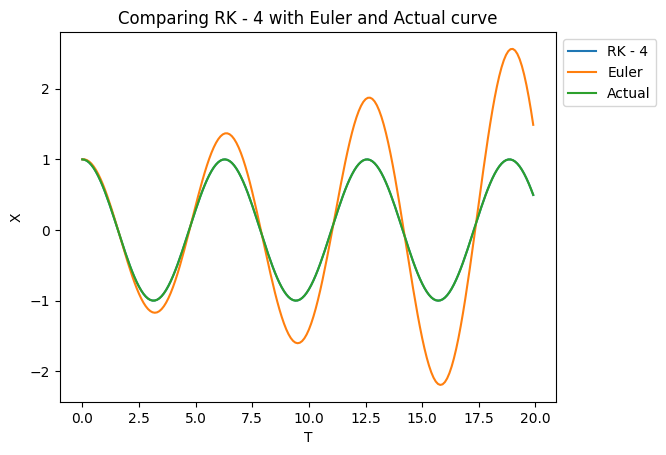

In [ ]:
X, V, T = rk_4(1.0, 0, 0, 0.1, 200)
X_e, V_e, T_e = euler(1.0, 0, 0, 0.1, 200)


plt.plot(T, X, label = "RK - 4")
plt.plot(T_e, X_e, label = "Euler")

x_og = [math.cos(T[i]) for i in range(len(T))]
plt.plot(T, x_og, label = "Actual")

plt.legend(bbox_to_anchor = (1,1))
plt.xlabel("T")
plt.ylabel("X")
plt.title("Comparing RK - 4 with Euler and Actual curve")
plt.show

Text(0.5, 1.0, 'Fourth Order Runge Kutta Method')

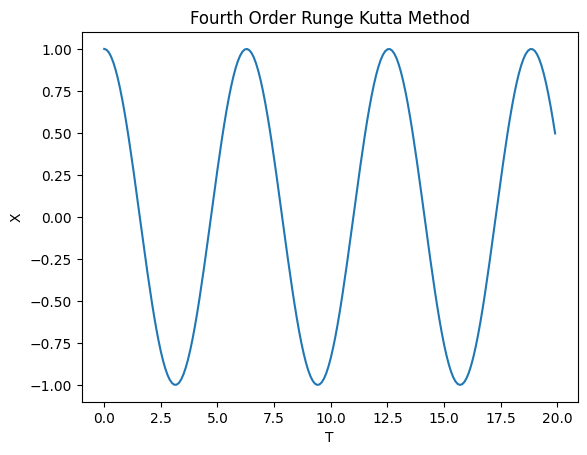

In [ ]:
plt.plot(T, X)
plt.xlabel("T")
plt.ylabel("X")
plt.title("Fourth Order Runge Kutta Method")

<function matplotlib.pyplot.show(close=None, block=None)>

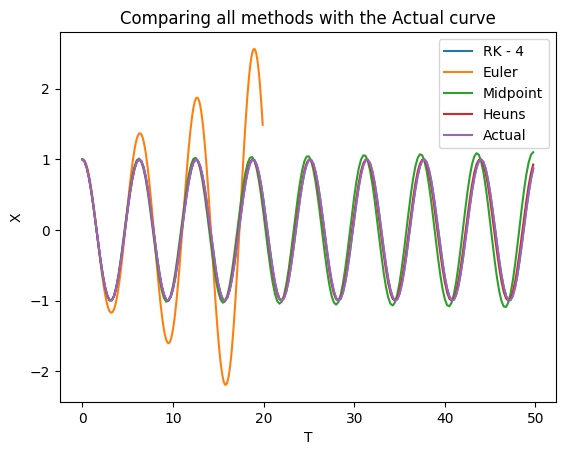

In [ ]:
X2, V2, T2 = rk_4(1.0, 0, 0, 0.25, 200)
X_mp, V_mp, T_mp = midpoint(1.0, 0, 0, 0.25, 200)
X_h, V_h, T_h = heuns(1.0, 0, 0, 0.25, 200)

plt.plot(T2, X2, label = "RK - 4")
plt.plot(T_e, X_e, label = "Euler")
plt.plot(T_mp, X_mp, label = "Midpoint")
plt.plot(T_h, X_h, label = "Heuns")
x_og2 = [math.cos(T_h[i]) for i in range(len(T_h))]
plt.plot(T_h, x_og2, label = "Actual")

plt.legend(bbox_to_anchor = (1,1))
plt.xlabel("T")
plt.ylabel("X")
plt.title("Comparing all methods with the Actual curve")
plt.show

We can see from the graph that Heun's and RK - 4 methods converge very well with the actual curve.

We observe that the Midpoint method visibly starts diverging slowly after t = 20.

Euler's method wasn't plotted because it was obvious that it will diverge fast.